In [53]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [55]:
df = pd.read_csv("historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [56]:
df[df.isnull().any(axis=1)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197212,1.0,2015-02-12 02:42:13,2015-02-12 03:39:29,2177,NaN,1.0,5,2800,5,300,700,28.0,28.0,21.0,446,800.0
197259,NaN,2015-02-10 01:32:37,2015-02-10 02:02:09,1340,NaN,NaN,1,849,1,849,849,25.0,13.0,20.0,251,1013.0
197363,1.0,2015-02-12 20:44:22,2015-02-12 21:30:44,2956,NaN,NaN,2,690,2,345,345,25.0,28.0,35.0,251,826.0
197416,1.0,2015-01-29 19:39:17,2015-01-29 20:34:21,2956,fast,4.0,1,639,1,639,639,26.0,26.0,37.0,251,NaN


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
standardizer = StandardScaler()
X_data = df[["total_items","min_item_price","max_item_price","num_distinct_items"]]
X_data = standardizer.fit_transform(X_data)
X_data = pd.DataFrame(X_data, columns = ["total_items","min_item_price","max_item_price","num_distinct_items"])
y_data = df["subtotal"]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,random_state = 0, test_size = 0.2)
X_data.head()


,total_items,min_item_price,max_item_price,num_distinct_items
0,0.301368,-0.247527,0.142210,0.815340
1,-0.823686,1.367300,0.430528,-1.024867
2,-0.823686,2.325086,1.325928,-1.024867
3,1.051404,-0.165158,1.146848,1.428742
4,-0.073650,0.792628,0.788688,0.201937


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


alphas = [0.1,0.5,1,5,10]

for n in alphas:
    scores = []
    val = KFold(n_splits=5)
    for i, (train_index, test_index) in enumerate(val.split(X_train)):
        regression = Lasso(alpha = n)
        regression.fit(X_train.iloc[train_index],y_train.iloc[train_index])
        scores.append(regression.score(X_train.iloc[test_index],y_train.iloc[test_index]))
    print(np.mean(scores))



0.7107844905289864
0.7107959492405809
0.7108102886301559
0.7109031410149529
0.710969126472781


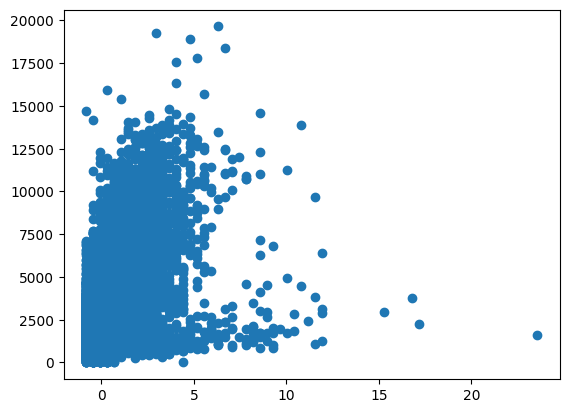

In [52]:

plt.scatter(X_test["total_items"],y_test)